* Importing Libraries
* Label encoding
* Scaling
* Train ,test split
* Pipeline for classification algorithm
* Evaluation of models 

# Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', None)
import datetime as dt

from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("hotel_final.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,...,arrival_day,month_year,Total_stays,guests,kids,lead_time_months,booking_location,is_previous_cancellations,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0


In [4]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
arrival_month               

In [6]:
df.shape

(118985, 38)

In [7]:
df["booking_location_encoded"]=df["booking_location"].map({"International":1,"Local	":0})
# Preprocessing label using map because there are only two label International and local

In [8]:
df["hotel_encoded"] = df["hotel"].map({"City Hotel":1,"Resort Hotel":0})
# Preprocessing label using map because there are only two label CityHotel and Resort Hotel

In [9]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [10]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [11]:
df['booking_location_encoded'] = df['booking_location_encoded'].replace('1', np.nan)

In [12]:
df.stb.freq(["booking_location_encoded"],cum_cols=False)

,booking_location_encoded,count,percent
0,1.0,70546,100.0


In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,...,Total_stays,guests,kids,lead_time_months,booking_location,is_previous_cancellations,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,0,2.0,0.0,11,Local,0,1,0,NaN,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,0,2.0,0.0,24,Local,0,1,0,NaN,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,1,1.0,0.0,0,International,0,0,0,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,1,1.0,0.0,0,International,0,0,0,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,2,2.0,0.0,0,International,0,0,0,1.0,0


In [14]:
#correlation_matrix = df.corr()
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Heatmap')
#plt.show()


In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'arrival_month', 'arrival_day', 'month_year', 'Total_stays', 'guests',
       'kids', 'lead_time_months', 'booking_location',
       'is_previous_cancellations', 'is_booking_changes', 'parking_space',
       'booking_location_encoded', 'hotel_encoded'],
      dtype='object')

In [16]:
df.shape

(118985, 40)

In [17]:
df['booking_location_encoded'] = df['booking_location_encoded'].replace('1', np.nan)

In [18]:
#df.dropna(X, inplace=True)

df.stb.freq(["booking_location_encoded"],cum_cols=False)


,booking_location_encoded,count,percent
0,1.0,70546,100.0


In [19]:
#X_book = df["booking_location_encoded"]


In [20]:
#X_book.dropna() 

# Model 

In [21]:
# Handle nan values

In [22]:
#df.dropna("booking_location_encoded", inplace=True)
df.replace('-', np.nan, inplace = True)
df = df.dropna()

In [23]:
X = df[['hotel_encoded','booking_location_encoded','lead_time','market_segment','deposit_type','parking_space','total_of_special_requests','is_previous_cancellations','is_repeated_guest','is_booking_changes','customer_type','Total_stays','guests']]
y = df['is_canceled']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [25]:
X_train.head()

,hotel_encoded,booking_location_encoded,lead_time,market_segment,deposit_type,parking_space,total_of_special_requests,is_previous_cancellations,is_repeated_guest,is_booking_changes,customer_type,Total_stays,guests
35698,0,1.0,144,Offline TA/TO,No Deposit,0,0,0,0,0,Transient,1,2.0
89375,1,1.0,100,Online TA,No Deposit,0,1,0,0,0,Transient-Party,4,2.0
91265,1,1.0,55,Online TA,No Deposit,0,1,0,0,0,Transient,4,2.0
103745,1,1.0,37,Online TA,No Deposit,0,1,0,0,0,Transient,1,1.0
103460,1,1.0,17,Offline TA/TO,No Deposit,0,0,0,0,0,Transient,1,2.0


In [26]:
cat_columns = ["market_segment","deposit_type","customer_type"]
num_columns = ["hotel_encoded","booking_location_encoded","lead_time","parking_space","total_of_special_requests","is_previous_cancellations","is_repeated_guest","is_booking_changes","Total_stays","guests"]            

In [27]:
cat_columns # Categorical Columns

['market_segment', 'deposit_type', 'customer_type']

In [28]:
num_columns # Numerical columns

['hotel_encoded',
 'booking_location_encoded',
 'lead_time',
 'parking_space',
 'total_of_special_requests',
 'is_previous_cancellations',
 'is_repeated_guest',
 'is_booking_changes',
 'Total_stays',
 'guests']

# Pipeline Creation

In [29]:
categorical_pipeline = Pipeline([
    ("encoder",OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ("scaler",RobustScaler())
])

preprocessor = ColumnTransformer([
    ("cat",categorical_pipeline,cat_columns),
    ("numerical",numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("1st step",preprocessor),
    ("algo log",LogisticRegression())
])

pipe_KNN = Pipeline([
    ("algo prep",preprocessor),
    ("algo",KNeighborsClassifier())
])

pipe_RF = Pipeline([
    ("algo prep",preprocessor),
    ("algo",RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("algo prep",preprocessor),
    ("algo",DecisionTreeClassifier())
])



In [30]:
X_train.to_csv("check.csv")

# Logistic Regression

In [31]:
pipe_logreg.fit(X_train,y_train)

Pipeline(steps=[('1st step',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['hotel_encoded',
                                                   'booking_location_encoded',
                                                   'lead_time', 'parking_space',
                                                   'total_of_special_requests',
                                                   'is_previous_cancellations',
                                                   'is_repeated_guest',
                                                   'is_booking_changes',
                                                   'Total_stays',
                                                   'guests'])])),
                ('algo log', LogisticRegression())])

In [32]:
y_pred_logreg_base = pipe_logreg.predict(X_test)

In [33]:
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [34]:
recall_logreg_base = recall_score(y_test,y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test,y_pred_logreg_base)
prec_logreg_base = precision_score(y_test,y_pred_logreg_base)
f1_score_logreg_base = f1_score(y_test,y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train,y_pred_logreg_base_train)

print(f"Training Accuracy: {acc_logreg_base}")
print(f"Testing Accuracy: {acc_logreg_base_train}")

Training Accuracy: 0.8213323883770376
Testing Accuracy: 0.8193528953150472


In [35]:
print(classification_report(y_test,y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10786
           1       0.67      0.47      0.55      3324

    accuracy                           0.82     14110
   macro avg       0.76      0.70      0.72     14110
weighted avg       0.81      0.82      0.81     14110



In [36]:
cm_logreg_base = confusion_matrix(y_test,y_pred_logreg_base,labels =[1,0])
df_logreg_base = pd.DataFrame(data=cm_logreg_base,index=["actual 1","actual 0"],columns=["predicted 1","predcited 0"])
df_logreg_base

,predicted 1,predcited 0
actual 1,1557,1767
actual 0,754,10032


<Axes: >

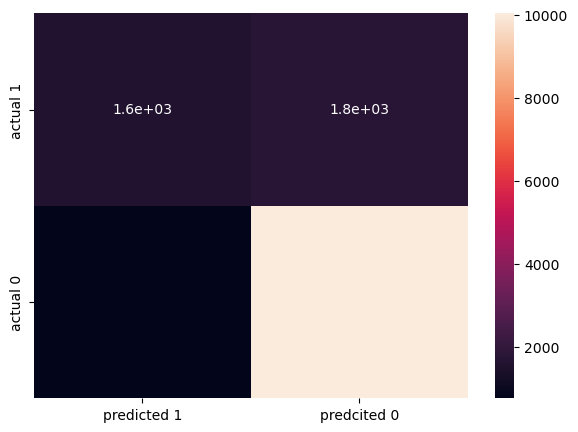

In [37]:
plt.figure(figsize=(7,5))
sns.heatmap(df_logreg_base,annot=True)

# KNN

In [38]:
pipe_KNN.fit(X_train,y_train)

Pipeline(steps=[('algo prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['hotel_encoded',
                                                   'booking_location_encoded',
                                                   'lead_time', 'parking_space',
                                                   'total_of_special_requests',
                                                   'is_previous_cancellations',
                                                   'is_repeated_guest',
                                                   'is_booking_changes',
                                                   'Total_stays',
                                                   'guests'])])),
                ('algo', KNeighborsClassifier())])

In [39]:
y_pred_KNN_base = pipe_KNN.predict(X_test)

In [40]:
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [42]:
recall_KNN_base = recall_score(y_test,y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test,y_pred_KNN_base)
prec_KNN_base = precision_score(y_test,y_pred_KNN_base)
f1_score_KNN_base = f1_score(y_test,y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train,y_pred_KNN_base_train)

print(f"Training Accuracy: {acc_KNN_base}")
print(f"Testing Accuracy: {acc_KNN_base_train}")

Training Accuracy: 0.8174344436569808
Testing Accuracy: 0.8657771635126515


In [43]:
print(classification_report(y_test,y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     10786
           1       0.63      0.56      0.59      3324

    accuracy                           0.82     14110
   macro avg       0.75      0.73      0.74     14110
weighted avg       0.81      0.82      0.81     14110



In [44]:
cm_KNN_base = confusion_matrix(y_test,y_pred_KNN_base,labels =[1,0])
df_KNN_base = pd.DataFrame(data=cm_KNN_base,index=["actual 1","actual 0"],columns=["predicted 1","predcited 0"])
df_KNN_base

,predicted 1,predcited 0
actual 1,1853,1471
actual 0,1105,9681


<Axes: >

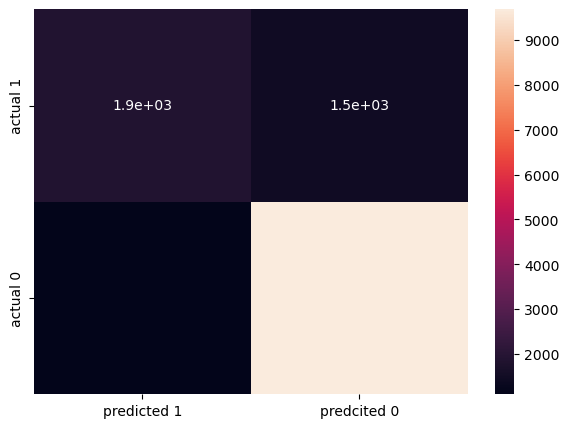

In [45]:
plt.figure(figsize=(7,5))
sns.heatmap(df_KNN_base,annot=True)

# Decision Tree

In [46]:
pipe_DT.fit(X_train,y_train)

Pipeline(steps=[('algo prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['hotel_encoded',
                                                   'booking_location_encoded',
                                                   'lead_time', 'parking_space',
                                                   'total_of_special_requests',
                                                   'is_previous_cancellations',
                                                   'is_repeated_guest',
                                                   'is_booking_changes',
                                                   'Total_stays',
                                                   'guests'])])),
                ('algo', DecisionTreeClassifier())])

In [47]:
y_pred_DT_base = pipe_DT.predict(X_test)

In [48]:
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [50]:
recall_DT_base = recall_score(y_test,y_pred_DT_base)
acc_DT_base = accuracy_score(y_test,y_pred_DT_base)
prec_DT_base = precision_score(y_test,y_pred_DT_base)
f1_score_DT_base = f1_score(y_test,y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train,y_pred_DT_base_train)

print(f"Training Accuracy: {acc_DT_base}")
print(f"Testing Accuracy: {acc_DT_base_train}")

Training Accuracy: 0.808008504606662
Testing Accuracy: 0.9270501098589553


In [51]:
print(classification_report(y_test,y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     10786
           1       0.60      0.54      0.57      3324

    accuracy                           0.81     14110
   macro avg       0.73      0.71      0.72     14110
weighted avg       0.80      0.81      0.80     14110



In [52]:
cm_DT_base = confusion_matrix(y_test,y_pred_DT_base,labels =[1,0])
df_DT_base = pd.DataFrame(data=cm_DT_base,index=["actual 1","actual 0"],columns=["predicted 1","predcited 0"])
df_DT_base

,predicted 1,predcited 0
actual 1,1792,1532
actual 0,1177,9609


<Axes: >

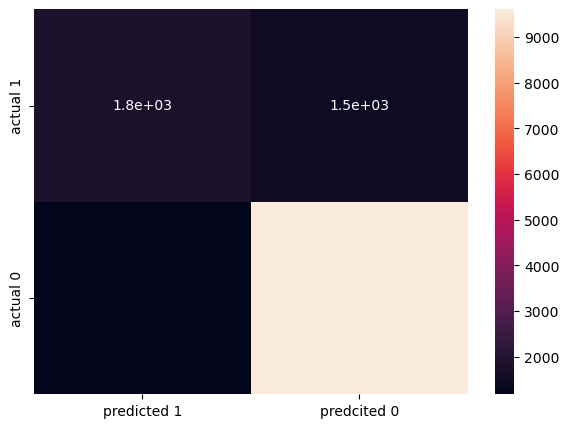

In [53]:
plt.figure(figsize=(7,5))
sns.heatmap(df_DT_base,annot=True)

# Random forest

In [54]:
pipe_RF.fit(X_train,y_train)

Pipeline(steps=[('algo prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['hotel_encoded',
                                                   'booking_location_encoded',
                                                   'lead_time', 'parking_space',
                                                   'total_of_special_requests',
                                                   'is_previous_cancellations',
                                                   'is_repeated_guest',
                                                   'is_booking_changes',
                                                   'Total_stays',
                                                   'guests'])])),
                ('algo', RandomForestClassifier())])

In [56]:
y_pred_RF_base = pipe_RF.predict(X_test)

In [57]:
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [59]:
recall_RF_base = recall_score(y_test,y_pred_RF_base)
acc_RF_base = accuracy_score(y_test,y_pred_RF_base)
prec_RF_base = precision_score(y_test,y_pred_RF_base)
f1_score_RF_base = f1_score(y_test,y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train,y_pred_RF_base_train)

print(f"Training Accuracy: {acc_RF_base}")
print(f"Testing Accuracy: {acc_RF_base_train}")

Training Accuracy: 0.8170800850460667
Testing Accuracy: 0.9270323906726203


In [60]:
print(classification_report(y_test,y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10786
           1       0.62      0.57      0.60      3324

    accuracy                           0.82     14110
   macro avg       0.75      0.73      0.74     14110
weighted avg       0.81      0.82      0.81     14110



In [61]:
cm_RF_base = confusion_matrix(y_test,y_pred_RF_base,labels =[1,0])
df_RF_base = pd.DataFrame(data=cm_RF_base,index=["actual 1","actual 0"],columns=["predicted 1","predcited 0"])
df_RF_base

,predicted 1,predcited 0
actual 1,1898,1426
actual 0,1155,9631


<Axes: >

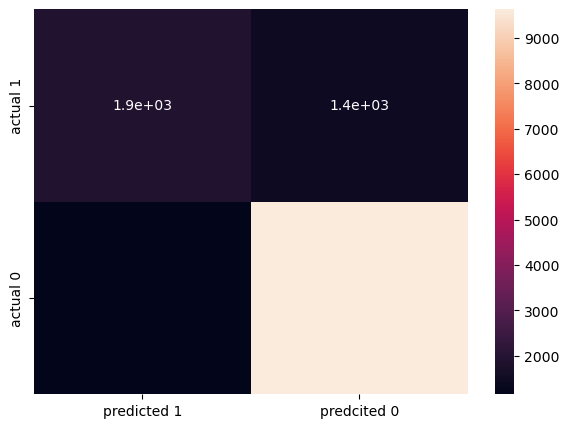

In [62]:
plt.figure(figsize=(7,5))
sns.heatmap(df_RF_base,annot=True)